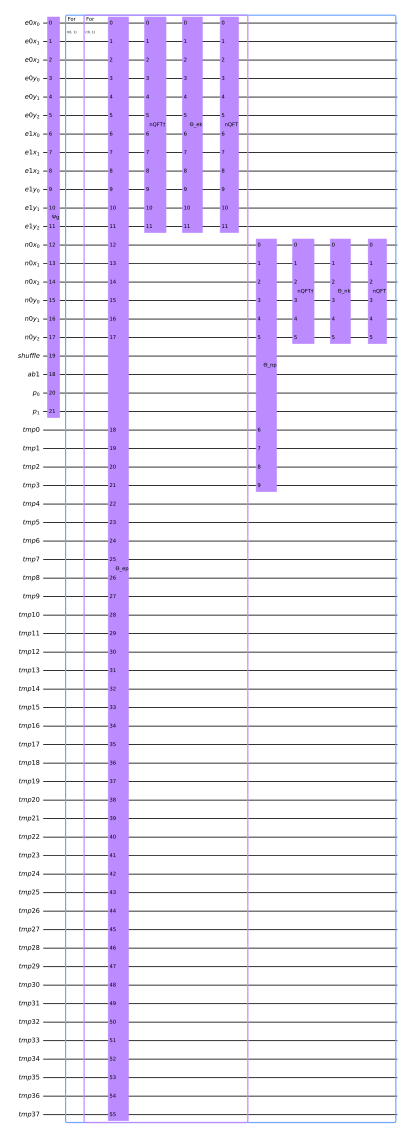

In [1]:
from crsq.blocks import time_evolution, antisymmetrization, discretization, energy_initialization, firstq, hamiltonian, time_evolution, wave_function

wfr_spec = wave_function.WaveFunctionRegisterSpec(2, 3, 2.0, 2, 1, 0)
ham_spec = hamiltonian.HamiltonianSpec(wfr_spec, [{"mass": 1680.0, "charge": 1.0}])
asy_spec = antisymmetrization.AntisymmetrizationSpec(wfr_spec, 3)
disc_spec = discretization.DiscretizationSpec(0.1)
evo_spec = time_evolution.TimeEvolutionSpec(ham_spec, disc_spec, 1, 1, time_evolution.SUZUKI_TROTTER)
eorbs = wave_function.make_test_elec_orbitals(wfr_spec, 4)
norbs = wave_function.make_test_nucl_orbitals(wfr_spec, 4)
ene_spec = energy_initialization.EnergyConfigurationSpec([0.1,0.1,0.2,0.2], eorbs, norbs)

# Regular build.
sim = firstq.Simulator(evo_spec, ene_spec, asy_spec, use_motion_block_gates=False)

sim.circuit.draw(scale=0.4)
